## Outliers and scaling : Train data

### working for the distance based models : outliers and scalers

In [1]:
#------------autoreloader
%load_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../..')

In [29]:
from src.data.load_data import load_data, get_info, get_shape, get_nan, save_data
from src.featured_engineering.plot_features import plot_graphs, plot_graphs_post_scaling
from src.featured_engineering.outliers import iqr_score, adjust_values
from src.featured_engineering.scalers import scale_feature

In [6]:
#-----------setting up the data path
df_path = '../../../data/intermidiate/train.csv'
df_path

'../../../data/intermidiate/train.csv'

In [7]:
#-------------loading the data and some initial checks
df = load_data(df_path)
df.head()

,Source,Destination,Total_Stops,Price,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,3897,1,0,0,0,24,3,22,20,1,10,2
1,1,1,2,7662,0,0,0,0,1,5,5,50,13,15,7
2,0,0,2,13882,0,1,0,0,9,6,9,25,4,25,19
3,1,1,1,6218,1,0,0,0,12,5,18,5,23,30,5
4,2,2,1,13302,1,0,0,0,1,3,16,50,21,35,4


In [8]:
#--------------null values
nan_values = get_nan(df)
nan_values

Source                       0
Destination                  0
Total_Stops                  0
Price                        0
Airline_IndiGo               0
Airline_Jet Airways          0
Airline_other                0
Additional_Info_Some info    0
Date_of_Journey_day          0
Date_of_Journey_month        0
Dep_Time_hour                0
Dep_Time_minute              0
Arrival_Time_hour            0
Arrival_Time_minute          0
Duration_in_hours            0
dtype: int64

In [9]:
#-----------get_info
df_info = get_info(df)
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Source                     10683 non-null  int64
 1   Destination                10683 non-null  int64
 2   Total_Stops                10683 non-null  int64
 3   Price                      10683 non-null  int64
 4   Airline_IndiGo             10683 non-null  int64
 5   Airline_Jet Airways        10683 non-null  int64
 6   Airline_other              10683 non-null  int64
 7   Additional_Info_Some info  10683 non-null  int64
 8   Date_of_Journey_day        10683 non-null  int64
 9   Date_of_Journey_month      10683 non-null  int64
 10  Dep_Time_hour              10683 non-null  int64
 11  Dep_Time_minute            10683 non-null  int64
 12  Arrival_Time_hour          10683 non-null  int64
 13  Arrival_Time_minute        10683 non-null  int64
 14  Duration_in_hours     

In [10]:
#-----------------making the df_copy in order to cross verify the comparison after scaling the data
df_copy = df.copy()
df_copy.head()

,Source,Destination,Total_Stops,Price,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,3897,1,0,0,0,24,3,22,20,1,10,2
1,1,1,2,7662,0,0,0,0,1,5,5,50,13,15,7
2,0,0,2,13882,0,1,0,0,9,6,9,25,4,25,19
3,1,1,1,6218,1,0,0,0,12,5,18,5,23,30,5
4,2,2,1,13302,1,0,0,0,1,3,16,50,21,35,4


### =========== Working with outliers ==============

In [11]:
#-----------------features to plot : numericals only
features_to_plot = [
    'Date_of_Journey_day', 'Date_of_Journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
    'Duration_in_hours', 'Price'
    ]
features_to_plot

['Date_of_Journey_day',
 'Date_of_Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_in_hours',
 'Price']

Feature : Date_of_Journey_day


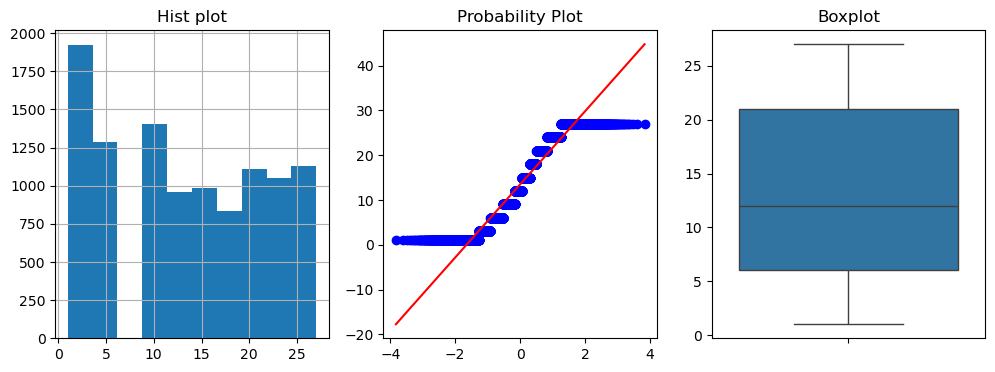

Feature : Date_of_Journey_month


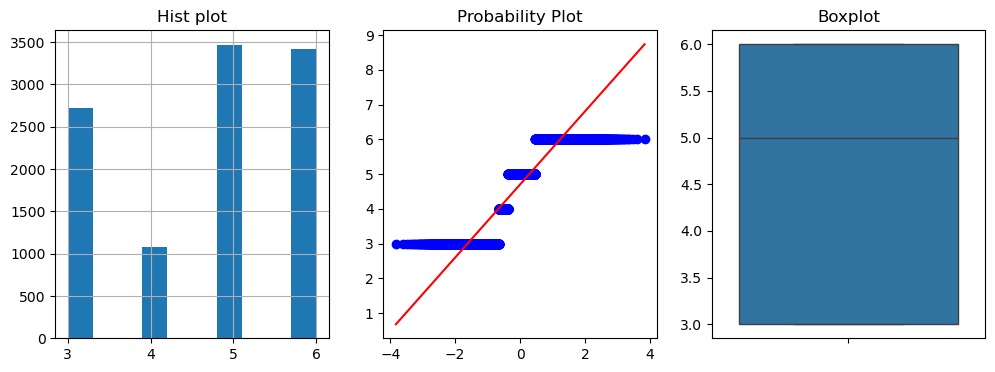

Feature : Dep_Time_hour


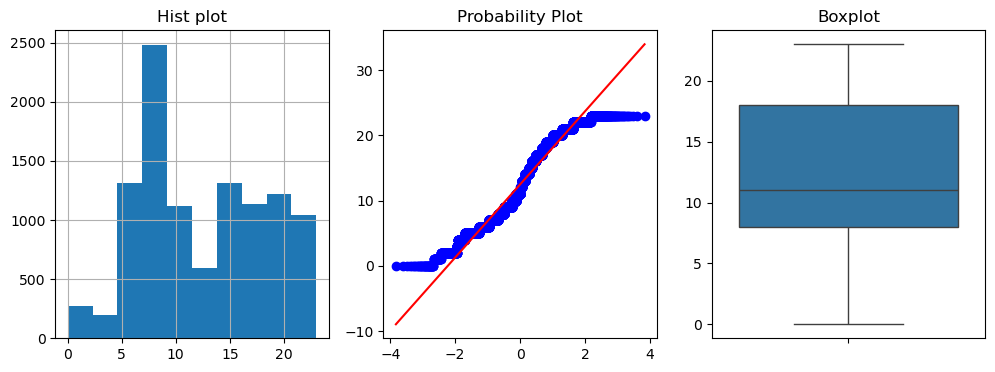

Feature : Dep_Time_minute


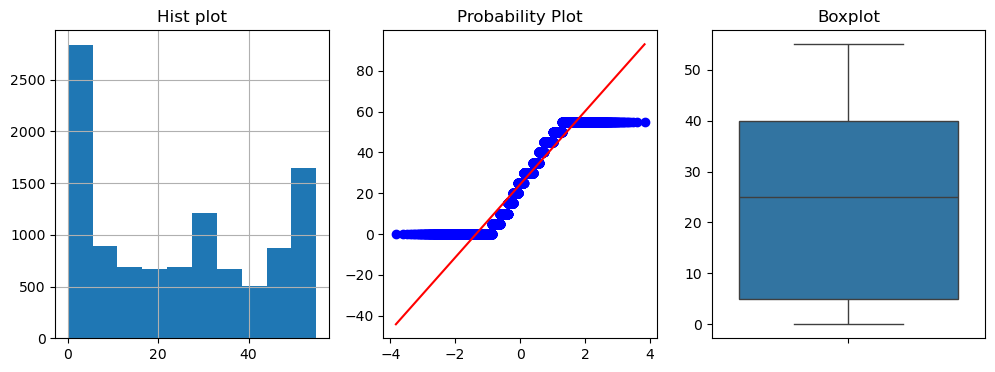

Feature : Arrival_Time_hour


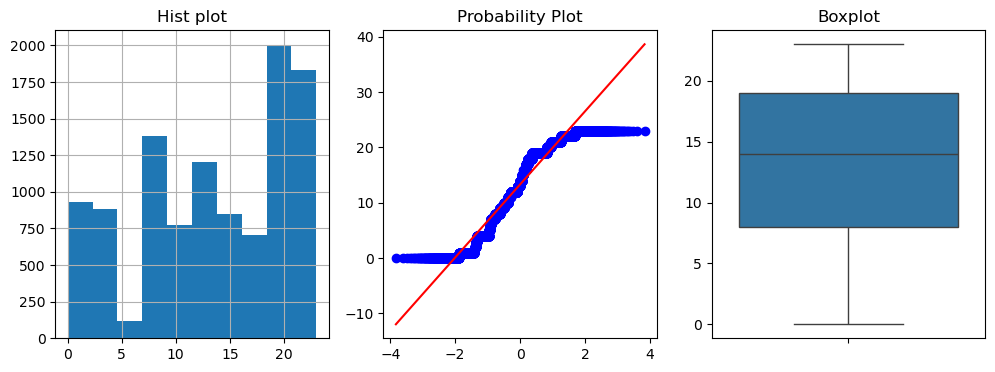

Feature : Arrival_Time_minute


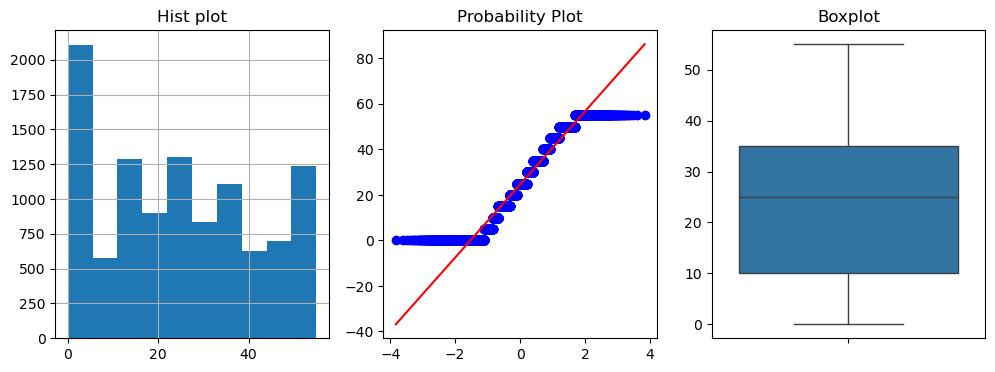

Feature : Duration_in_hours


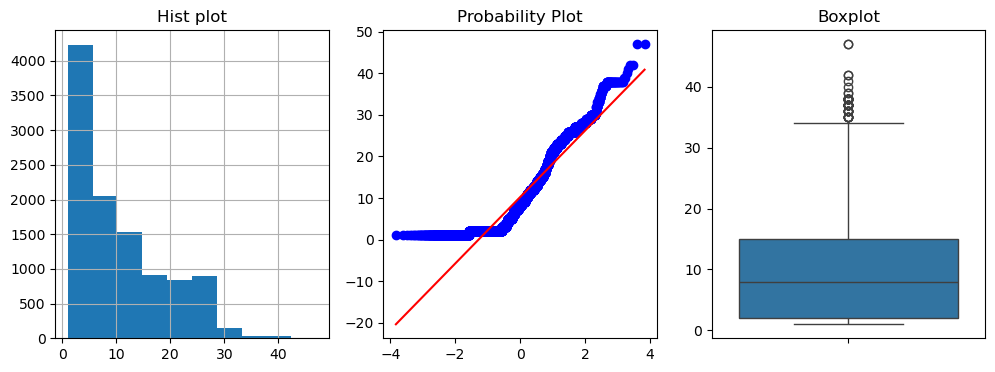

Feature : Price


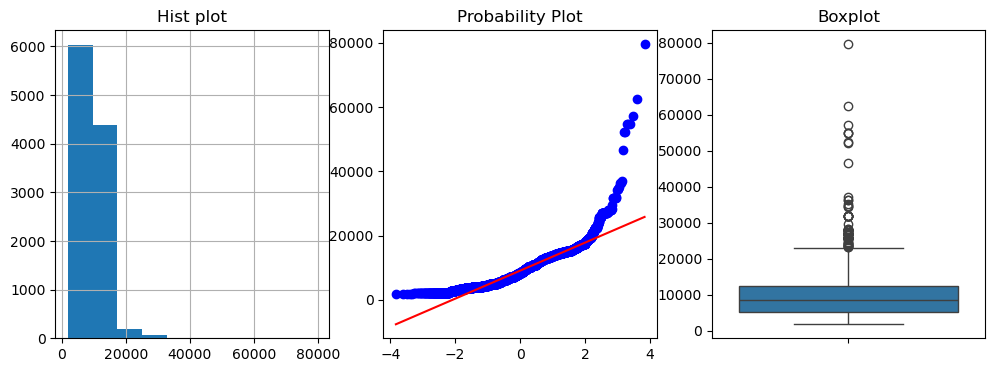

In [12]:
#------------------plotting the graphs
for features in features_to_plot : 
    print(f"Feature : {features}")
    plot_graphs(df, features)

In [13]:
### Even though the price column also contains the outliers, we don't deal with it, because it is our target feature
### but we do apply the scaler on it.

In [14]:
#------------------features with outliers, based on graphs
features_with_outliers = ['Duration_in_hours']
features_with_outliers

['Duration_in_hours']

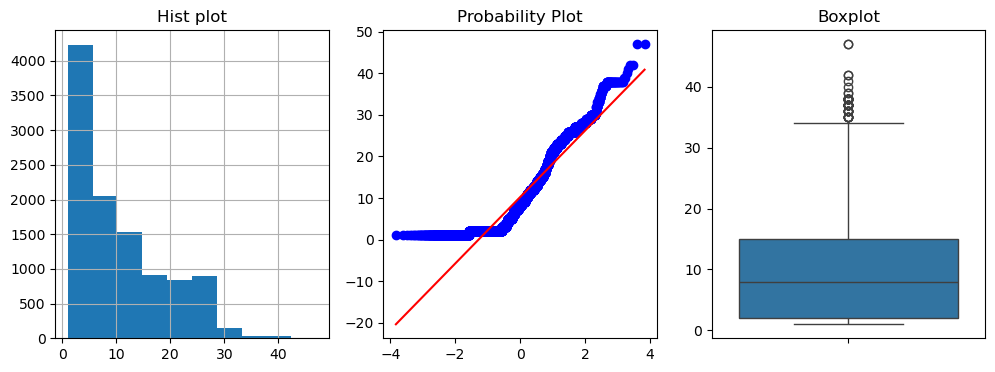

In [15]:
#-----------plotting the graphs only for the 'Duration_in_hours' feature
plot_graphs(df, features_with_outliers[0])

In [16]:
#-------------getting the iqr score and then checking the IQR values with respect to min and max values
#-------------the function return Q3, Q1 and IQR score(in order as written) in form of a list
#-------------the item at first index is Q3 then Q1 and finally the IQR
iqr_score_duration_in_hours = iqr_score(df, 'Duration_in_hours')
iqr_score_duration_in_hours

[15.0, 2.0, 13.0]

In [17]:
#--------------min and max values
print(f"{df['Duration_in_hours'].min()} :: {df['Duration_in_hours'].max()}")

1 :: 47


In [18]:
#------------------checking the 1.5 * IQR and 3 * IQR for setting up the limits
print(f"{1.5 * iqr_score_duration_in_hours[2]} :: {3.0 * iqr_score_duration_in_hours[2]}")

19.5 :: 39.0


In [19]:
#------------------taking the lower limit as 1 and upper limit as 30
lower_limit, upper_limit = 1, 30

In [20]:
#----------------making the adjutsments
adjust_values(df, 'Duration_in_hours', lower_limit, upper_limit)

In [21]:
#-----------------checking the adjustments by checking the min and max values
print(f"{df['Duration_in_hours'].min()} :: {df['Duration_in_hours'].max()}")

1 :: 30


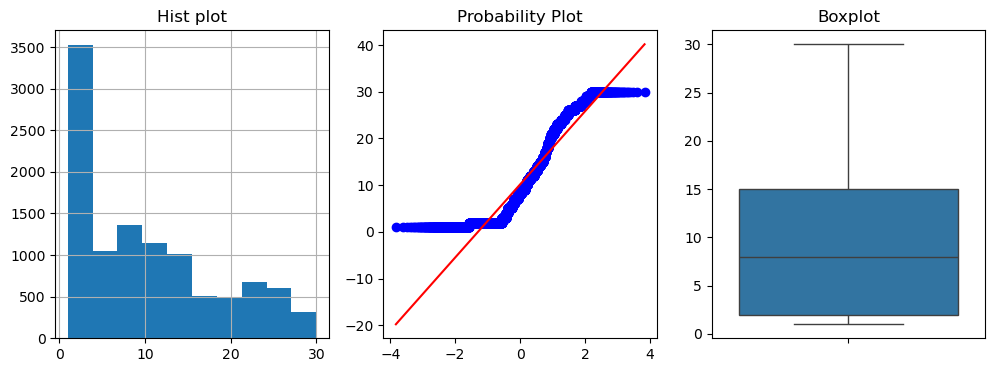

In [22]:
#-----------plotting the graphs for the 'Duration_in_hours' feature after removing the outliers
plot_graphs(df, features_with_outliers[0])

In [23]:
#------------------------df.head()
df.head()

,Source,Destination,Total_Stops,Price,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,3897,1,0,0,0,24,3,22,20,1,10,2
1,1,1,2,7662,0,0,0,0,1,5,5,50,13,15,7
2,0,0,2,13882,0,1,0,0,9,6,9,25,4,25,19
3,1,1,1,6218,1,0,0,0,12,5,18,5,23,30,5
4,2,2,1,13302,1,0,0,0,1,3,16,50,21,35,4


In [24]:
#---------------updating the df_copy
df_copy['Duration_in_hours'] = df['Duration_in_hours']

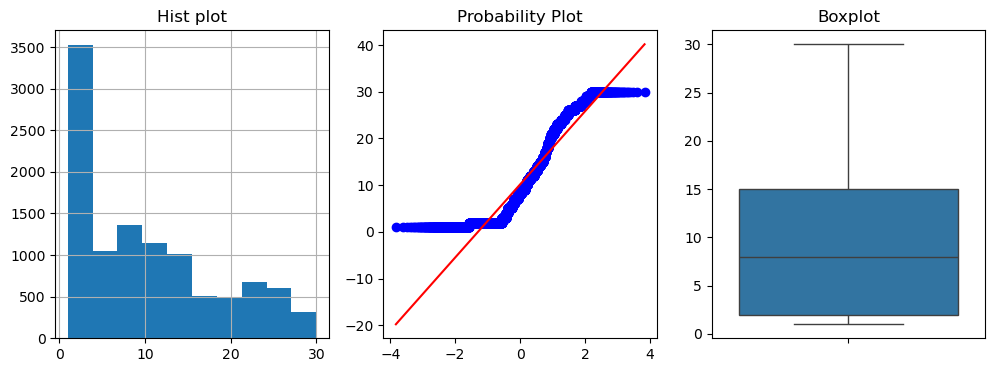

In [25]:
#-----------------veryfying the df_copy
plot_graphs(df_copy, features_with_outliers[0])

### =============== working with scalers =================

In [30]:
#--------------first applying on the rest of the numerical columns except the price feature
cols_for_scaler = [
    'Date_of_Journey_day', 'Date_of_Journey_month', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 
    'Duration_in_hours'
    ]
cols_for_scaler

['Date_of_Journey_day',
 'Date_of_Journey_month',
 'Dep_Time_hour',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Arrival_Time_minute',
 'Duration_in_hours']

In [31]:
scale_feature(df, cols_for_scaler)

In [32]:
df.head()

,Source,Destination,Total_Stops,Price,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,3897,1,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.034483
1,1,1,2,7662,0,0,0,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.206897
2,0,0,2,13882,0,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.620690
3,1,1,1,6218,1,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.137931
4,2,2,1,13302,1,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.103448


In [33]:
### the scaler is already saved in the background, check with the src files for more

In [34]:
#------------------scaling the price feature
col_scale_price = ['Price']
scale_feature(df, col_scale_price)

In [35]:
df.head()

,Source,Destination,Total_Stops,Price,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,0.027497,1,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.034483
1,1,1,2,0.075920,0,0,0,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.206897
2,0,0,2,0.155917,0,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.620690
3,1,1,1,0.057348,1,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.137931
4,2,2,1,0.148457,1,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.103448


Feature : Date_of_Journey_day


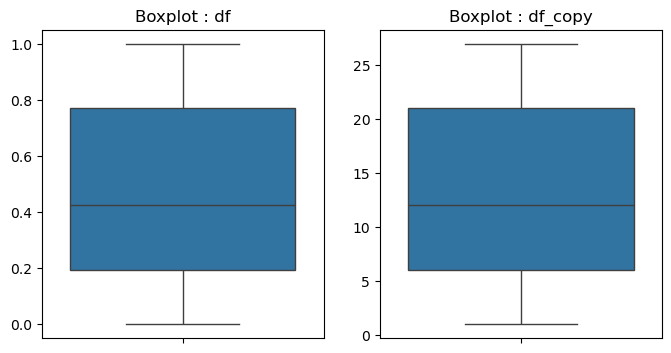

Feature : Date_of_Journey_month


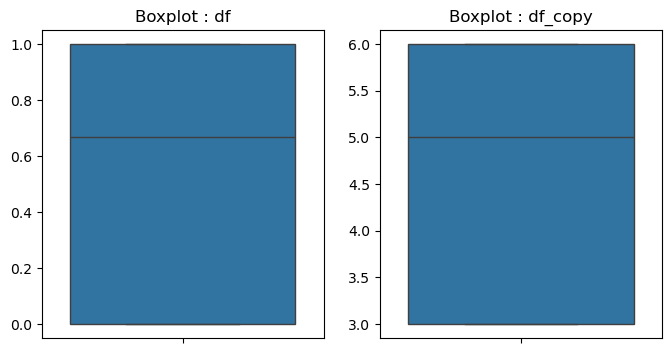

Feature : Dep_Time_hour


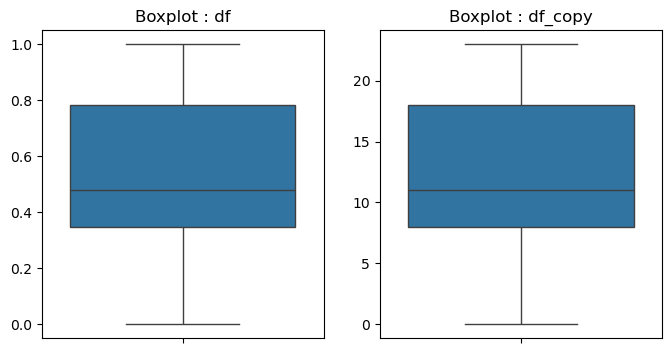

Feature : Dep_Time_minute


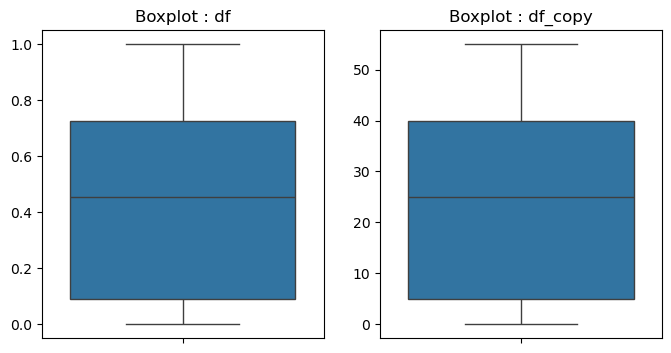

Feature : Arrival_Time_hour


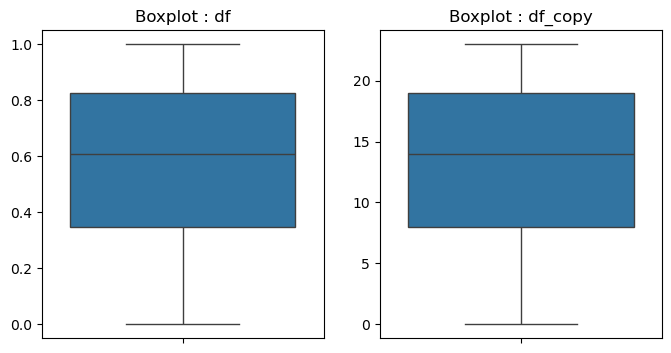

Feature : Arrival_Time_minute


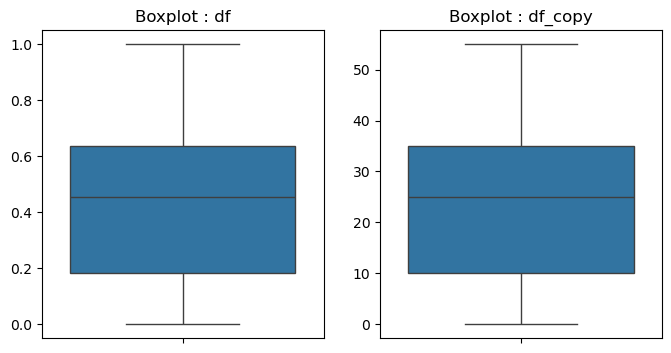

Feature : Duration_in_hours


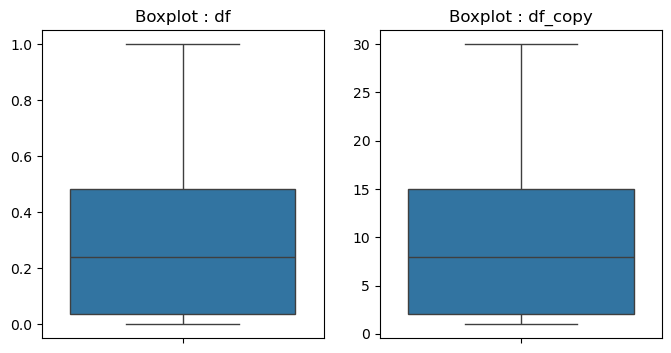

Feature : Price


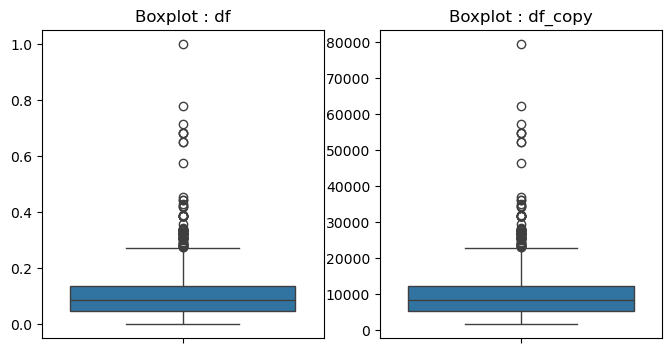

In [36]:
for features in features_to_plot : 
    print(f"Feature : {features}")
    plot_graphs_post_scaling(df, df_copy, features)

##### ---------------- completetion --------------

In [38]:
#--------------saving the data
df_train_distance_path = '../../../data/preprocessed/distance/train.csv'
save_data(df, df_train_distance_path)

In [39]:
#----------------checking if everything went well
df = load_data(df_train_distance_path)
df.head()

,Source,Destination,Total_Stops,Price,Airline_IndiGo,Airline_Jet Airways,Airline_other,Additional_Info_Some info,Date_of_Journey_day,Date_of_Journey_month,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_in_hours
0,2,2,0,0.027497,1,0,0,0,0.884615,0.000000,0.956522,0.363636,0.043478,0.181818,0.034483
1,1,1,2,0.075920,0,0,0,0,0.000000,0.666667,0.217391,0.909091,0.565217,0.272727,0.206897
2,0,0,2,0.155917,0,1,0,0,0.307692,1.000000,0.391304,0.454545,0.173913,0.454545,0.620690
3,1,1,1,0.057348,1,0,0,0,0.423077,0.666667,0.782609,0.090909,1.000000,0.545455,0.137931
4,2,2,1,0.148457,1,0,0,0,0.000000,0.000000,0.695652,0.909091,0.913043,0.636364,0.103448
